# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [4]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [5]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Разделите данные на две части - данные для моделирования (80%) и отложенную выборку (20%). Убедитесь, что распределение целевой переменной (`G3`) одинаково в обоих частях.  
  __NB__: Отложенную выборку нужно использовать только для финальной оценки качества модели. Обучение и кросс-валидацию следует проводить на данных для моделирования.  
* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

#### Перед разделением данных сделаем преобразование данных и исправим имеющиеся ошибки
Выведем список всех признаков и распределим по кортжеам в 3 категории

In [6]:
print(data.dtypes)
categoric = ("Subject", "school", "sex", "address","famsize" ,"Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup",
              "paid", "activities", "nursery", "higher", "internet", "romantic", "cheating")
numberic = ('ID', 'age', 'failures', 'absences', 'G1', 'G2', 'G3')
sort_categoric = ("Medu", "Fedu", "traveltime", "studytime", "famrel", "freetime", "goout", "Dalc", "Walc", "health")

ID              int64
Subject        object
school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu           object
Fedu           object
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime        int64
goout           int64
Dalc          float64
Walc          float64
health          int64
absences        int64
cheating       object
G1              int64
G2              int64
G3              int64
dtype: object


Выведем уникальные значения для категориальных и упорядоченные категориальные. Найдем среди них "плохие" значения. Для числовых просто удостоверимся, что нет не числовых значений.

In [7]:
print("Sort Categorical Values:")
for value in sort_categoric:
    print(value, data[value].unique())
print()
print("Categorical Values:")
for value in categoric:
    print(value, data[value].unique())

Sort Categorical Values:
Medu ['3' '1' '2' '4' '0' 'o']
Fedu ['4' '2' '3' '1' 'o' '0']
traveltime [1 2 3 4]
studytime [1 2 4 3]
famrel [ 3.  5.  4.  1.  2. nan]
freetime [2 3 4 1 5]
goout [1 4 5 3 2]
Dalc [ 1.  3.  4.  2.  5. nan]
Walc [ 4.  3.  5.  1.  2. nan]
health [5 3 4 2 1]

Categorical Values:
Subject ['Por' 'Math']
school ['GP' 'MS']
sex ['F' 'M' 'm']
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T' 't']
Mjob ['services' 'other' 'health' 'at_home' 'teacher' 'at-home']
Fjob ['other' 'services' 'health' 'at-home' 'teacher' 'at_home']
reason ['course' 'home' 'reputation' 'other']
guardian ['father' 'mother' 'other' 'futher']
schoolsup ['no' 'yes']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['yes' 'no']
romantic ['no' nan 'yes']
cheating [nan 'yes' 'no']


#### Теперь исправим имеющиеся ошибки

In [8]:
data.loc[data['Medu'] == 'o', 'Medu'] = '0'
data.loc[data['Fedu'] == 'o', 'Fedu'] = '0'
data.loc[data['sex'] == 'm', 'sex'] = 'M'
data.loc[data['Pstatus'] == 't', 'Pstatus'] = 'T'
data.loc[data['Mjob'] == 'at-home', 'Mjob'] = 'at_home'
data.loc[data['Fjob'] == 'at-home', 'Fjob'] = 'at_home'
data.loc[data['guardian'] == 'futher', 'guardian'] = 'father'

print("Sort Categorical Values:")
for value in sort_categoric:
    print(value, data[value].unique())
print()
print("Categorical Values:")
for value in categoric:
    print(value, data[value].unique())

Sort Categorical Values:
Medu ['3' '1' '2' '4' '0']
Fedu ['4' '2' '3' '1' '0']
traveltime [1 2 3 4]
studytime [1 2 4 3]
famrel [ 3.  5.  4.  1.  2. nan]
freetime [2 3 4 1 5]
goout [1 4 5 3 2]
Dalc [ 1.  3.  4.  2.  5. nan]
Walc [ 4.  3.  5.  1.  2. nan]
health [5 3 4 2 1]

Categorical Values:
Subject ['Por' 'Math']
school ['GP' 'MS']
sex ['F' 'M']
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Mjob ['services' 'other' 'health' 'at_home' 'teacher']
Fjob ['other' 'services' 'health' 'at_home' 'teacher']
reason ['course' 'home' 'reputation' 'other']
guardian ['father' 'mother' 'other']
schoolsup ['no' 'yes']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['yes' 'no']
romantic ['no' nan 'yes']
cheating [nan 'yes' 'no']


#### Также исправим типы некоторых значений

In [9]:
import numpy as np

In [10]:

data[['Medu', 'Fedu']] = data[['Medu', 'Fedu']].astype(np.int64)
print(data.dtypes)

ID              int64
Subject        object
school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime        int64
goout           int64
Dalc          float64
Walc          float64
health          int64
absences        int64
cheating       object
G1              int64
G2              int64
G3              int64
dtype: object


#### Исправим проблему с пустыми ячейками, удалив столбцы с большим количеством пропущенных значений, а некоторые заменив на среднее значение

In [11]:
print(data.isnull().sum())

ID              0
Subject         0
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic       10
famrel         10
freetime        0
goout           0
Dalc           10
Walc           10
health          0
absences        0
cheating      700
G1              0
G2              0
G3              0
dtype: int64


In [12]:
columns = data.columns.values.tolist()
empty_columns = list()
for value in columns:
    if data[value].isnull().sum() != 0:
        if(data[value].dtypes == 'object'):    
            data = data.fillna({value : data[value].value_counts().index[0]})
        else:
            data = data.fillna({value : data[value].median()})
data.drop(columns=["cheating"], inplace=True)
print(data.isnull().sum())
print(data.dtypes)

ID            0
Subject       0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
ID              int64
Subject        object
school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid     

In [13]:
data['Walc'] = data['Walc'].apply(int, convert_dtype=True)
data['Dalc'] = data['Dalc'].apply(int, convert_dtype=True)
data['famrel'] = data['famrel'].apply(int, convert_dtype=True)

### Выполним кодирование для категориальных переменных (Label Encoding)

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [15]:
def countable(df=data):
    all_categories = list(categoric)
    all_categories.remove("cheating")
    all_categories_dict = dict()
    for value in all_categories:
        all_categories_dict[value] = set(data[value].unique())
    for i in all_categories_dict:
        all_categories_dict[i] = (all_categories_dict[i], len(all_categories_dict[i]))
    return all_categories_dict

data_enc_label = data[[column for column in data.columns if data[column].dtypes == 'object']].copy()
categ = [column for column in data.columns if data[column].dtypes == 'object']
labelencoder = LabelEncoder()
for i in categ:
    data_enc_label[i] = labelencoder.fit_transform(data_enc_label[i])
data_enc_label

,Subject,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,0,1,0,0,3,2,0,0,0,0,0,0,1,1,1,0
1,1,0,0,1,0,1,2,2,0,1,0,0,0,1,0,1,1,0
2,1,0,1,1,1,1,1,3,0,1,0,0,0,0,0,1,1,0
3,1,1,1,1,0,1,2,3,1,0,0,0,0,1,1,1,1,0
4,1,0,0,1,0,1,0,2,1,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,0,0,0,1,3,3,3,2,0,1,1,1,1,1,1,1
1040,1,0,1,0,0,1,1,3,3,1,0,0,0,1,1,1,1,1
1041,1,1,0,0,1,1,0,2,0,0,0,1,0,0,1,1,0,0
1042,1,0,1,1,0,1,0,2,0,1,0,0,0,0,1,1,0,0


### Теперь выполним One Hot Encoding

In [16]:
data_enc_label.columns

Index(['Subject', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [17]:
# One hot encoding
hot = OneHotEncoder(handle_unknown='ignore')
categories_data = countable(data[[column for column in data.columns if data[column].dtypes == 'object']].copy())
one_hot_df = pd.DataFrame(hot.fit_transform(data_enc_label[['Mjob', 'Fjob', 'guardian', 'reason']]).toarray())
one_hot_df.columns = [column + '_'+ str(list(categories_data[column][0])[i]) for column in ['Mjob', 'Fjob', 'guardian', 'reason']
                      for i in range(categories_data[column][1])]
for column in one_hot_df.columns:
     one_hot_df[column] = one_hot_df[column].apply(int, convert_dtype=True)
        
data_enc_label = data_enc_label.drop(['Mjob', 'Fjob', 'guardian', 'reason'], axis=1)
data_enc_label.columns = [column + '_'+ str(list(categories_data[column][0])[1]) for column in data_enc_label.columns]
data_object_encoded = data_enc_label.join(one_hot_df)
encoded_df = data_enc_label.join(one_hot_df)
encoded_df

,Subject_Math,school_MS,sex_M,address_R,famsize_GT3,Pstatus_T,schoolsup_no,famsup_no,paid_no,activities_no,nursery_no,higher_no,internet_no,romantic_no,Mjob_other,Mjob_services,Mjob_health,Mjob_teacher,Mjob_at_home,Fjob_other,Fjob_services,Fjob_health,Fjob_teacher,Fjob_at_home,guardian_mother,guardian_other,guardian_father,reason_course,reason_other,reason_home,reason_reputation
0,1,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
1,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,1,0,1,1,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,1,1,1,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
4,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,0,0,0,1,0,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
1040,1,0,1,0,0,1,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1041,1,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1042,1,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0


In [18]:
labels = data['G3']
objects = [label for label in data.columns if data[label].dtypes == 'object']
l_data = data.drop(columns=['ID','G3'])
l_data = l_data.drop(columns=objects)
l_data = l_data.join(data_object_encoded)
l_data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Subject_Math,school_MS,sex_M,address_R,famsize_GT3,...,higher_no,internet_no,romantic_no,Mjob_other,Mjob_services,Mjob_health,Mjob_teacher,Mjob_at_home,Fjob_other,Fjob_services,Fjob_health,Fjob_teacher,Fjob_at_home,guardian_mother,guardian_other,guardian_father,reason_course,reason_other,reason_home,reason_reputation
0,16,3,4,1,1,0,3,2,1,1,4,5,12,15,13,1,0,0,1,0,...,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
1,17,3,2,1,2,0,5,3,4,1,3,3,2,17,18,1,0,0,1,0,...,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,16,1,2,2,1,2,4,4,5,3,5,5,0,9,8,1,0,1,1,1,...,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,17,2,3,2,2,0,4,4,3,1,1,3,4,14,15,1,1,1,1,0,...,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
4,16,1,1,2,1,0,4,3,2,1,4,5,2,12,13,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,15,3,3,2,3,2,4,2,1,2,3,3,8,10,10,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
1040,15,2,1,1,2,0,5,4,2,1,1,5,4,10,9,1,0,1,0,0,...,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1041,16,1,1,3,2,0,5,3,2,1,1,1,0,16,17,1,1,0,0,1,...,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1042,16,2,1,4,1,0,3,2,1,1,1,2,4,9,9,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0


In [19]:
l_data_out_G1 = l_data.drop(columns=['G1'])
l_data_out_G1.shape[1]

45

### Feature engineerign 
Рассмотрим коррреляцию признаков

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

<AxesSubplot:>

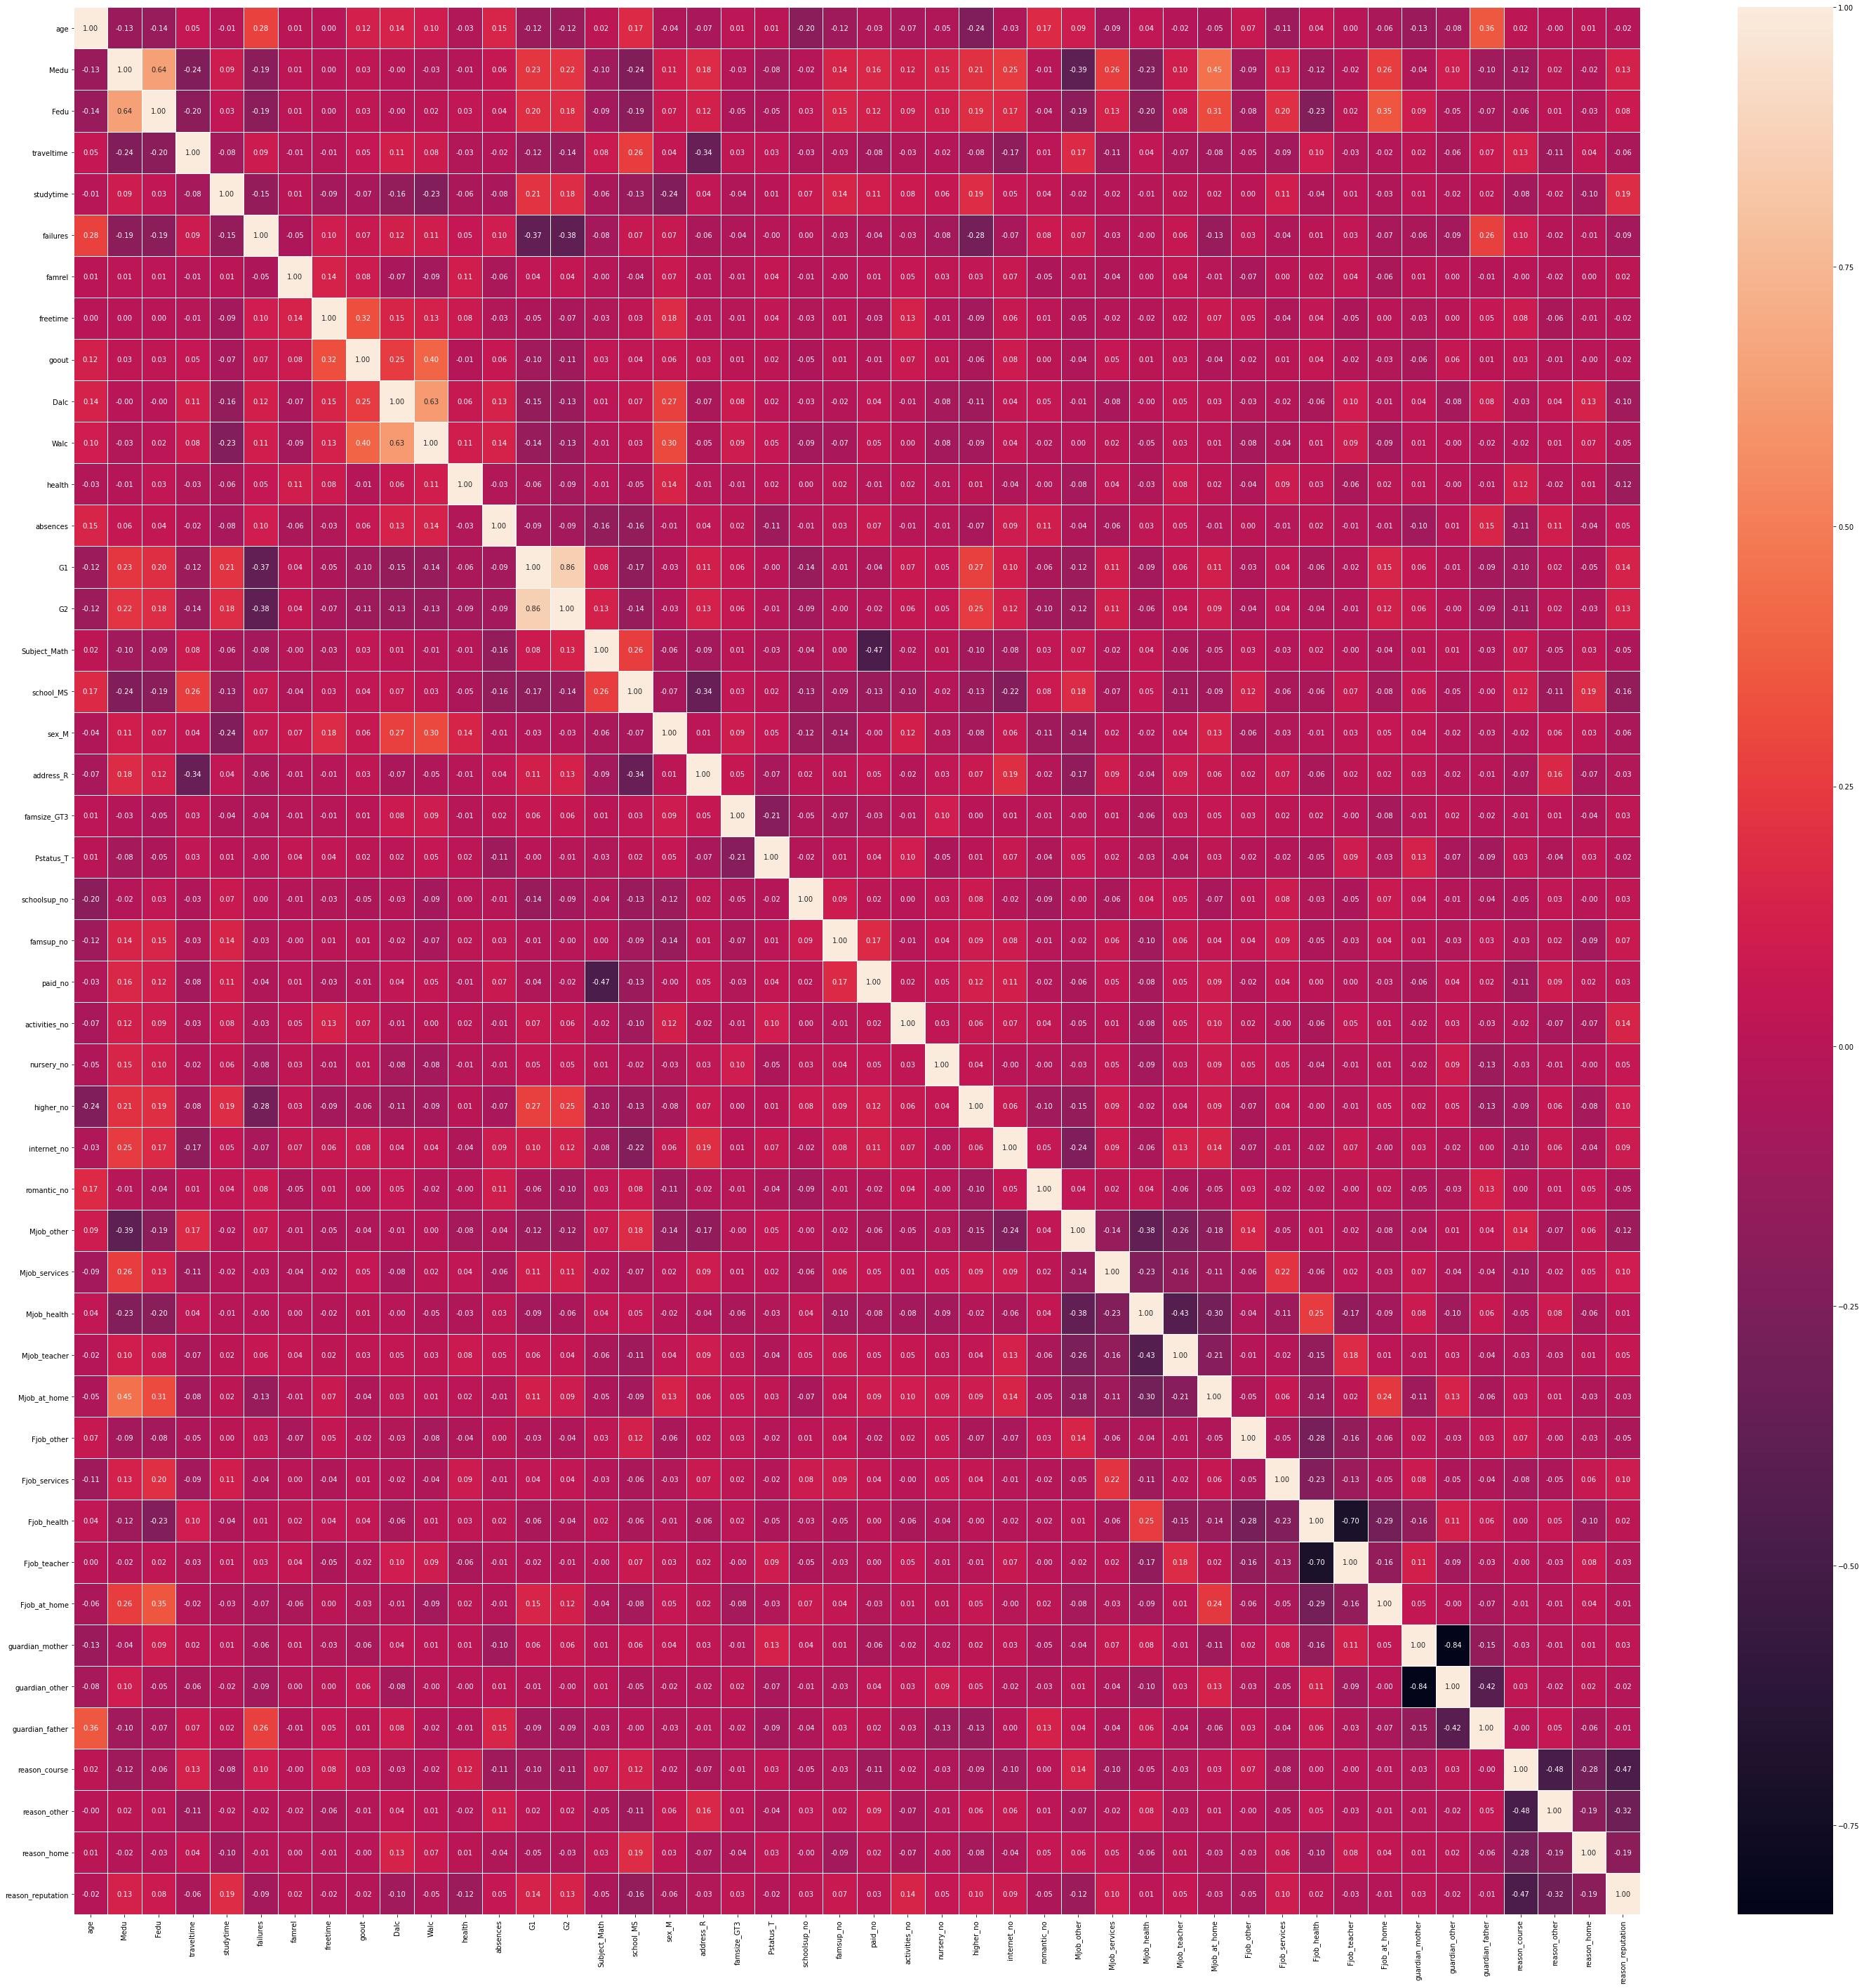

In [21]:
plt.figure(figsize=(50, 50))
sns.heatmap(l_data.corr(), annot=True, fmt=".2f", linewidths=.5)

### Признаки с высокой корреляцией
Medu и Fedu
Walc и Dalc
При этом можно их можно выразить путем объединения
То есть общее отношение к алкоголю и образование родителей

In [22]:
l_data['Сalc'] = l_data.loc[:, ['Walc', 'Dalc']].sum(1)
l_data['Pedu'] = l_data.loc[:, ['Fedu', 'Medu']].sum(1)
l_data = l_data.drop(columns=['Walc', 'Dalc', 'Fedu', 'Medu'])
l_data.head()

,age,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,G2,Subject_Math,school_MS,sex_M,address_R,famsize_GT3,Pstatus_T,schoolsup_no,famsup_no,paid_no,...,romantic_no,Mjob_other,Mjob_services,Mjob_health,Mjob_teacher,Mjob_at_home,Fjob_other,Fjob_services,Fjob_health,Fjob_teacher,Fjob_at_home,guardian_mother,guardian_other,guardian_father,reason_course,reason_other,reason_home,reason_reputation,Сalc,Pedu
0,16,1,1,0,3,2,1,5,12,15,13,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,5,7
1,17,1,2,0,5,3,4,3,2,17,18,1,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,4,5
2,16,2,1,2,4,4,5,5,0,9,8,1,0,1,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,8,3
3,17,2,2,0,4,4,3,3,4,14,15,1,1,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,2,5
4,16,2,1,0,4,3,2,5,2,12,13,1,0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,5,2


In [23]:
l_data

,age,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,G2,Subject_Math,school_MS,sex_M,address_R,famsize_GT3,Pstatus_T,schoolsup_no,famsup_no,paid_no,...,romantic_no,Mjob_other,Mjob_services,Mjob_health,Mjob_teacher,Mjob_at_home,Fjob_other,Fjob_services,Fjob_health,Fjob_teacher,Fjob_at_home,guardian_mother,guardian_other,guardian_father,reason_course,reason_other,reason_home,reason_reputation,Сalc,Pedu
0,16,1,1,0,3,2,1,5,12,15,13,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,5,7
1,17,1,2,0,5,3,4,3,2,17,18,1,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,4,5
2,16,2,1,2,4,4,5,5,0,9,8,1,0,1,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,8,3
3,17,2,2,0,4,4,3,3,4,14,15,1,1,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,2,5
4,16,2,1,0,4,3,2,5,2,12,13,1,0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,15,2,3,2,4,2,1,3,8,10,10,0,0,0,0,0,1,0,1,1,...,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,5,6
1040,15,1,2,0,5,4,2,5,4,10,9,1,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,2,3
1041,16,3,2,0,5,3,2,1,0,16,17,1,1,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,2,2
1042,16,4,1,0,3,2,1,2,4,9,9,1,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,2,3


In [24]:
labels

0       14
1       17
2       10
3       16
4       13
        ..
1039    10
1040    10
1041    18
1042    11
1043    11
Name: G3, Length: 1044, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
y = labels

x_train, x_test, y_train, y_test = train_test_split(l_data, y, test_size=0.2)

In [26]:
x_train.head(10)

,age,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,G2,Subject_Math,school_MS,sex_M,address_R,famsize_GT3,Pstatus_T,schoolsup_no,famsup_no,paid_no,...,romantic_no,Mjob_other,Mjob_services,Mjob_health,Mjob_teacher,Mjob_at_home,Fjob_other,Fjob_services,Fjob_health,Fjob_teacher,Fjob_at_home,guardian_mother,guardian_other,guardian_father,reason_course,reason_other,reason_home,reason_reputation,Сalc,Pedu
859,16,3,2,0,5,3,2,4,4,8,10,0,0,0,1,0,1,1,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,2,6
670,18,4,2,0,4,2,5,2,2,10,9,1,0,0,1,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,2,4
827,16,1,1,0,1,2,2,5,6,10,11,1,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,4,4
205,15,1,2,0,5,2,2,5,8,8,8,0,0,0,1,1,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,2,7
683,15,1,2,0,4,3,3,5,0,14,15,1,0,1,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,2,8
810,20,2,1,1,5,3,1,5,5,8,10,1,0,0,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,2,1
201,18,1,3,0,4,2,4,2,0,14,15,1,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,4,3
300,17,1,2,0,4,2,2,3,4,14,13,1,0,0,1,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,2,4
691,18,1,2,0,3,1,2,2,21,17,18,0,0,0,1,0,1,0,1,1,...,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,4,7
709,16,2,4,0,1,2,1,1,4,10,9,1,1,0,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,2,4


In [27]:
y_train.describe()

count    835.000000
mean      11.261078
std        3.898146
min        0.000000
25%       10.000000
50%       11.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

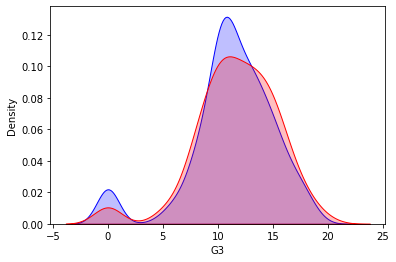

In [28]:
fig = sns.kdeplot(y_train, shade=True, color="b")
fig = sns.kdeplot(y_test, shade=True, color="r")
plt.show()

#### Распределение примерно G3 одинаково

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* Для решения задачи примените следующие методы:  
  * Линейная регрессия + регуляризации  
  * Полиномиальная регрессия  
  * KNN  
  * Деревья решений, Random Forest  
  
  Для каждого метода выполните настройку гиперпараметров на кросс-валидации.  
<br>    
* Оцените качество каждой модели на отложенной выборке, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

In [29]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV

In [30]:
def print_metrics(current, prediction):
    print("MSE ", metrics.mean_squared_error(current, prediction))
    print("RMSE ", np.sqrt(metrics.mean_squared_error(current, prediction)))
    print("R2 ", metrics.r2_score(current, prediction))
    print("MAE ", metrics.mean_absolute_error(current, prediction))

In [31]:
x_train

,age,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,G2,Subject_Math,school_MS,sex_M,address_R,famsize_GT3,Pstatus_T,schoolsup_no,famsup_no,paid_no,...,romantic_no,Mjob_other,Mjob_services,Mjob_health,Mjob_teacher,Mjob_at_home,Fjob_other,Fjob_services,Fjob_health,Fjob_teacher,Fjob_at_home,guardian_mother,guardian_other,guardian_father,reason_course,reason_other,reason_home,reason_reputation,Сalc,Pedu
859,16,3,2,0,5,3,2,4,4,8,10,0,0,0,1,0,1,1,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,2,6
670,18,4,2,0,4,2,5,2,2,10,9,1,0,0,1,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,2,4
827,16,1,1,0,1,2,2,5,6,10,11,1,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,4,4
205,15,1,2,0,5,2,2,5,8,8,8,0,0,0,1,1,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,2,7
683,15,1,2,0,4,3,3,5,0,14,15,1,0,1,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,17,2,1,0,5,5,5,5,0,8,13,1,1,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,8,4
881,15,1,2,0,5,4,2,5,0,10,11,1,0,1,1,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,7,8
165,16,1,2,0,4,3,5,3,0,14,13,1,0,0,1,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,2,4
130,19,1,1,0,3,2,3,5,5,8,9,0,1,1,1,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,6,2


In [32]:
x_train, x_test, y_train, y_test
x_train_out_G2 = x_train.drop("G2", axis=1)
x_test_out_G2 = x_test.drop("G2", axis=1)

#### With G1

In [33]:
from sklearn import metrics

### Linear Regression

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_out_G2, y_train)
y_pred = lin_reg.predict(x_test_out_G2)
print("Linear Regression:")
print_metrics(y_test, y_pred)

Linear Regression:
MSE  4.226434353364712
RMSE  2.05582935900933
R2  0.693136044816937
MAE  1.4236967095918063


### Ridge Regression

In [35]:
lambdas = [0, 0.1, 0.5, 1, 5, 10, 25, 50, 100, 250, 500, 1000, 5000, 10000]
ridgecv = RidgeCV(alphas=lambdas, cv=5)
ridgecv.fit(x_train_out_G2, y_train)
y_pred = ridgecv.predict(x_test_out_G2)
print("Ridge regression")
print_metrics(y_test, y_pred)
print("The best Ridge: ", ridgecv.alpha_)

Ridge regression
MSE  4.046743448558446
RMSE  2.0116519203277803
R2  0.706182659799937
MAE  1.3880591459294536
The best Ridge:  100.0


In [36]:
print(ridgecv.coef_)
print(x_train_out_G2.columns)

[-2.34666851e-02 -1.21748871e-02 -1.86335408e-02 -3.95684211e-01
  1.01871320e-01 -1.54947776e-02 -7.94758874e-02 -8.76349441e-02
  3.14879187e-02  9.93438889e-01  6.83148377e-01  4.47215264e-02
 -7.87389870e-02  2.51437077e-01  8.23507204e-02 -8.94555791e-02
  1.39589868e-01  1.32190590e-01  5.86741747e-02 -1.93746405e-02
 -3.91339951e-02  2.57613779e-02  1.28653801e-01 -3.42382402e-01
 -9.24604894e-02  1.95413084e-01 -6.30022929e-04  2.02408593e-02
 -1.22563431e-01  1.10937910e-01  1.57864515e-02  1.05113366e-01
 -1.38848091e-01 -9.29896365e-02 -8.12303887e-02 -2.88008502e-03
  8.41104737e-02  7.30876024e-02 -5.91762538e-02  1.69319705e-02
 -3.08433191e-02  4.32451124e-02  3.15638533e-02]
Index(['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
       'goout', 'health', 'absences', 'G1', 'Subject_Math', 'school_MS',
       'sex_M', 'address_R', 'famsize_GT3', 'Pstatus_T', 'schoolsup_no',
       'famsup_no', 'paid_no', 'activities_no', 'nursery_no', 'higher_no',
    

### Lasso Regression

In [37]:
lasso = LassoCV(alphas=np.arange(0.1, 10, 0.1), normalize=True, cv=5)
lasso.fit(x_train_out_G2, y_train)
y_pred = lasso.predict(x_test_out_G2)
print("Lasso regression")
print_metrics(y_test, y_pred)
print(f"The best Lasso : ", lasso.alpha_)

Lasso regression
MSE  12.448965205974094
RMSE  3.528309114288896
R2  0.09613201539489435
MAE  2.694943808135903
The best Lasso :  0.1


#### Without C1

In [38]:
x_train_out_G2_G1 = x_train_out_G2.drop('G1', axis=1)
x_test_out_G2_G1 = x_test_out_G2.drop('G1', axis=1)

### Linear Regression

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_out_G2_G1, y_train)
y_pred = lin_reg.predict(x_test_out_G2_G1)
print("Linear Regression:")
print_metrics(y_test, y_pred)

Linear Regression:
MSE  11.115114125338467
RMSE  3.3339337313957618
R2  0.19297743732915296
MAE  2.4827816611842106


### Lasso Regression

In [40]:
lasso = LassoCV(alphas=np.arange(0.1, 10, 0.1), normalize=True, cv=5)
lasso.fit(x_train_out_G2_G1, y_train)
y_pred = lasso.predict(x_test_out_G2_G1)
print("Lasso regression")
print_metrics(y_test, y_pred)
print(f"The best Lasso : ", lasso.alpha_)

Lasso regression
MSE  13.936201637352175
RMSE  3.733122237129689
R2  -0.011850083809294976
MAE  2.8784975503538375
The best Lasso :  9.9


In [41]:
print(lasso.coef_)
print(x_test_out_G2_G1.columns)

[-0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0.  0.  0. -0. -0.  0. -0.
  0.  0.  0.  0. -0. -0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0.
 -0.  0. -0.  0. -0.  0.]
Index(['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
       'goout', 'health', 'absences', 'Subject_Math', 'school_MS', 'sex_M',
       'address_R', 'famsize_GT3', 'Pstatus_T', 'schoolsup_no', 'famsup_no',
       'paid_no', 'activities_no', 'nursery_no', 'higher_no', 'internet_no',
       'romantic_no', 'Mjob_other', 'Mjob_services', 'Mjob_health',
       'Mjob_teacher', 'Mjob_at_home', 'Fjob_other', 'Fjob_services',
       'Fjob_health', 'Fjob_teacher', 'Fjob_at_home', 'guardian_mother',
       'guardian_other', 'guardian_father', 'reason_course', 'reason_other',
       'reason_home', 'reason_reputation', 'Сalc', 'Pedu'],
      dtype='object')


### Ridge Regression

In [42]:
lambdas = [0, 0.1, 0.5, 1, 5, 10, 25, 50, 100, 250, 500, 1000, 5000, 10000]
ridgecv = RidgeCV(alphas=lambdas, cv=5)
ridgecv.fit(x_train_out_G2_G1, y_train)
y_pred = ridgecv.predict(x_test_out_G2_G1)
print("Ridge regression")
print_metrics(y_test, y_pred)
print("The best Ridge: ", ridgecv.alpha_)

Ridge regression
MSE  10.77512251874835
RMSE  3.2825481746271983
R2  0.21766282468036735
MAE  2.441460623175207
The best Ridge:  25.0


In [43]:
print(ridgecv.coef_)
print(x_test_out_G2_G1.columns)

[-0.09545277 -0.05505375  0.37759431 -1.41869353  0.22788614  0.0519118
 -0.21652779 -0.20103129  0.02569519  1.50240396 -0.59334823 -0.14973393
  0.48346816  0.50054466  0.03127017 -1.1139359  -0.27735511 -0.10965987
  0.15231047  0.03325025  1.16914638  0.505478   -0.76733951 -0.29803836
  0.82886217 -0.29138776  0.2415289  -0.48096495  0.1643313  -0.14136042
 -0.16229492 -0.50979127  0.64911532 -0.10765814 -0.28952791  0.39718604
  0.00280843 -0.03222301 -0.10315819  0.13257277 -0.05959166  0.16044607]
Index(['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
       'goout', 'health', 'absences', 'Subject_Math', 'school_MS', 'sex_M',
       'address_R', 'famsize_GT3', 'Pstatus_T', 'schoolsup_no', 'famsup_no',
       'paid_no', 'activities_no', 'nursery_no', 'higher_no', 'internet_no',
       'romantic_no', 'Mjob_other', 'Mjob_services', 'Mjob_health',
       'Mjob_teacher', 'Mjob_at_home', 'Fjob_other', 'Fjob_services',
       'Fjob_health', 'Fjob_teacher', 'Fjob_at

## Polynomial Regression

### With G1

In [44]:
degrees = [2, 3]
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [45]:
for i in degrees:
    pol = PolynomialFeatures(degree=i, include_bias=False)
    pol.fit(x_train_out_G2)
    pol_train = pol.transform(x_train_out_G2)
    pol_test = pol.transform(x_test_out_G2)
    pol_reg_model = linear_model.LinearRegression(normalize=True)
    pol_reg_model.fit(pol_train, y_train)
    y_pred = pol_reg_model.predict(pol_test)
    print("Degree ", i)
    print_metrics(y_test, y_pred)
    print()

Degree  2
MSE  459.6702696877804
RMSE  21.439922333995998
R2  -32.37476114450022
MAE  13.425725179425838

Degree  3
MSE  9.792249622045073
RMSE  3.1292570399449566
R2  0.2890251692260689
MAE  2.3672642636269843



## Without G1

In [46]:
for i in degrees:
    pol = PolynomialFeatures(degree=i, include_bias=False)
    pol.fit(x_train_out_G2_G1)
    pol_train = pol.transform(x_train_out_G2_G1)
    pol_test = pol.transform(x_test_out_G2_G1)
    pol_reg_model = linear_model.LinearRegression(normalize=True)
    pol_reg_model.fit(pol_train, y_train)
    y_pred = pol_reg_model.predict(pol_test)
    print("Degree ", i)
    print_metrics(y_test, y_pred)
    print()

Degree  2
MSE  451.10614867841724
RMSE  21.239259607585602
R2  -31.752955663597078
MAE  12.430542868290221

Degree  3
MSE  21.797326252948857
RMSE  4.668760676341084
R2  -0.5826138979469679
MAE  3.390798819847356



### KNN

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

#### With G1

In [48]:
parametrs = {'n_neighbors': range(1, 70), 
             'weights':['distance', 'uniform']}
grid = GridSearchCV(estimator = KNeighborsRegressor(), param_grid=parametrs, scoring='r2')
grid.fit(x_train_out_G2, y_train)
y_pred = grid.predict(x_test_out_G2)
print("Params: ", grid.best_estimator_)
print_metrics(y_test, y_pred)

Params:  KNeighborsRegressor(n_neighbors=16, weights='distance')
MSE  4.881869782963953
RMSE  2.2094953683961305
R2  0.6455475833674384
MAE  1.5367793456297518


#### Without G1

In [49]:
parametrs = {'n_neighbors': range(1, 70), 
             'weights':['distance', 'uniform']}
grid = GridSearchCV(estimator = KNeighborsRegressor(), param_grid=parametrs, scoring='r2')
grid.fit(x_train_out_G2_G1, y_train)
y_pred = grid.predict(x_test_out_G2_G1)
print("Params: ", grid.best_estimator_)
print_metrics(y_test, y_pred)

Params:  KNeighborsRegressor(n_neighbors=17, weights='distance')
MSE  11.627244564985658
RMSE  3.4098745673390476
R2  0.15579375975596055
MAE  2.550116629493896


### Деревья решений, Random Forest

### With G1

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
p = {'randomforestregressor__n_estimators': np.arange(100, 250, 1), 
     'randomforestregressor__max_features': ['log2', 'sqrt', 'auto']}

In [51]:
fold = KFold(shuffle=True)
rand_forest = RandomForestRegressor()
rand_forest_pipe = make_pipeline(rand_forest)
grid = GridSearchCV(rand_forest_pipe, p, cv=fold, 
                       scoring='neg_mean_absolute_error', n_jobs=-1)
grid.fit(x_train_out_G2, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_features': ['log2', 'sqrt',
                                                                 'auto'],
                         'randomforestregressor__n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119...
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
       217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
       2

In [52]:
grid.best_params_

{'randomforestregressor__max_features': 'auto',
 'randomforestregressor__n_estimators': 149}

In [53]:
main_rand_forest_model = grid.best_estimator_
y_pred = main_rand_forest_model.predict(x_test_out_G2)
print_metrics(y_test, y_pred)

MSE  3.49098245283576
RMSE  1.8684170981972306
R2  0.7465341719790318
MAE  1.3328409492309177


### Without G1

In [54]:
fold = KFold(shuffle=True)
rand_forest = RandomForestRegressor()
rand_forest_pipe = make_pipeline(rand_forest)
grid = GridSearchCV(rand_forest_pipe, p, cv=fold, 
                       scoring='neg_mean_absolute_error', n_jobs=-1)
grid.fit(x_train_out_G2_G1, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_features': ['log2', 'sqrt',
                                                                 'auto'],
                         'randomforestregressor__n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119...
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
       217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
       2

In [55]:
grid.best_params_

{'randomforestregressor__max_features': 'sqrt',
 'randomforestregressor__n_estimators': 200}

In [56]:
main_rand_forest_model = grid.best_estimator_
y_pred = main_rand_forest_model.predict(x_test_out_G2_G1)
print_metrics(y_test, y_pred)

MSE  9.02116495215311
RMSE  3.003525420593791
R2  0.34501044470910114
MAE  2.2348086124401916


## Заключение
1) Сразу понятно, что в тех моделях, где используется признак G1 результаты намного лучше, так как G1 - это оценка за первое получгодие, следовательно по нему легче предсказывать. Он имеет очень сильное влияние на итоговый результат.

2) Очень хорошие результаты показал Ridge Regression, KNN и Random Forest. При этом у всех присутствовал признак G1. Кстатит KNN не показал большой разницы с G1 и без G1.

3) Худший результат показал Polynomial Regression, при подборке степени это очень хоршо видно

## Часть 3. Бинарная классификация

Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  


### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

Для тренировки и тестирования используем датаесет без значений G1 и G2
Кроме того, преобразуем нашу переменную G3 в бинарное значение для классификации

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import graphviz
from sklearn.tree import export_graphviz
from wand.image import Image

In [58]:
x_train = x_train_out_G2_G1
x_test = x_test_out_G2_G1
y_bin_G3_train = (y_train >= 8).apply(int, convert_dtype=True)
y_bin_G3_test = (y_test >= 8).apply(int, convert_dtype=True)
print("Train meanings: ")
print(y_bin_G3_train)
print(y_bin_G3_train.value_counts(normalize=True))
print("Test meanings: ")
print(y_bin_G3_test)
print(y_bin_G3_test.value_counts(normalize=True))

Train meanings: 
859    1
670    1
827    1
205    0
683    1
      ..
324    1
881    1
165    1
130    1
277    1
Name: G3, Length: 835, dtype: int64
1    0.900599
0    0.099401
Name: G3, dtype: float64
Test meanings: 
360    1
243    1
273    1
510    1
457    1
      ..
84     1
647    1
713    1
783    1
498    1
Name: G3, Length: 209, dtype: int64
1    0.91866
0    0.08134
Name: G3, dtype: float64


### Проверим распределение

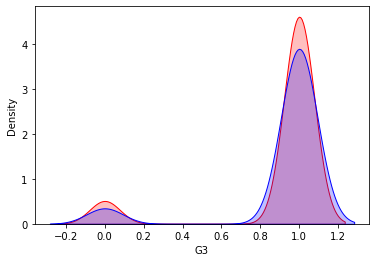

In [63]:
fig = sns.kdeplot(y_bin_G3_train, shade=True, color="r")
fig = sns.kdeplot(y_bin_G3_test, shade=True, color="b")
plt.show()

In [64]:
main_fold = StratifiedKFold(n_splits=5, shuffle=True)
models = []
models_scores = []
x_tr = np.array(x_train)
y_bin_G3_tr = np.array(y_bin_G3_train)
for tr_ind, tst_ind in main_fold.split(x_train, y_bin_G3_train):
    train_x = x_tr[tr_ind]
    train_y = y_bin_G3_train.iloc[tr_ind]
    test_x = x_tr[tst_ind]
    test_y = y_bin_G3_train.iloc[tst_ind]
    dec_tree_model = DecisionTreeClassifier(max_depth=5)
    dec_tree_model.fit(train_x, train_y)
    models.append(dec_tree_model)
    models_scores.append(dec_tree_model.score(test_x, test_y))
print("Scores: ", models_scores)
print("Mean score: ", np.mean(models_scores))

Scores:  [0.874251497005988, 0.8682634730538922, 0.8622754491017964, 0.8862275449101796, 0.8982035928143712]
Mean score:  0.8778443113772456


In [ ]:
print_data = l_data.drop(columns=['G1', 'G2'])
data = export_graphviz(models[2], 
                           out_file=None, 
                           feature_names=print_data.columns, 
                           class_names=['failed','passed'],
                           filled=True, 
                           rounded=True, 
                           special_characters=True)
gr = graphviz.Source(data) 
gr.render("dсt.pdf")
png = Image(filename="dсt.pdf")
png

### Задание 2  
  
На кросс-валидации (5-fold из 2 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

In [76]:
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
def print_class_metrics(current, predict):
    metric = {}
    metric['precision'] = metrics.precision_score(current, predict)
    metric['recall'] = metrics.recall_score(current, predict)                                                
    metric['f1'] = metrics.f1_score(current, predict)
    metric['accuracy'] = metrics.accuracy_score(current, predict)
    metric['roc-auc'] =  metrics.roc_auc_score(current, predict)
#     print("Accuracy: ", metrics.accuracy_score(current, predict))
#     print("Precision: ", metrics.precision_score(current, predict))
#     print("Recall: ", metrics.recall_score(current, predict))
#     print("F1: ", metrics.f1_score(current, predict))
#     print("ROC-AUC: ", metrics.roc_auc_score(current, predict))
    return metric

In [88]:
main_fold = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
t_test_num = np.arange(1, 15, 1)
rows = list()

for tr_num in t_test_num:
    models_scores = []
    x_tr = np.array(x_train)
    y_bin_G3_tr = np.array(y_bin_G3_train)
    for tr_ind, tst_ind in main_fold.split(x_train, y_bin_G3_train):
        train_x = x_tr[tr_ind]
        train_y = y_bin_G3_train.iloc[tr_ind]
        test_x = x_tr[tst_ind]
        test_y = y_bin_G3_train.iloc[tst_ind]
        rand_forest_model = RandomForestClassifier(n_estimators=tr_num)
        rand_forest_model.fit(train_x, train_y)
        prediction = rand_forest_model.predict(test_x)
        models_scores.append(print_class_metrics(test_y, prediction))
    main_scores = {key: [] for key in models_scores[0].keys()}
    for example in models_scores:
        for key, value in example.items():
            main_scores[key].append(value)
    for key in main_scores.keys():
        main_scores[key] = np.mean(main_scores[key])
        row = (tr_num, main_scores[key], key)
        rows.append(row)
trees_data = pd.DataFrame(rows, columns=['trees_num', 'score', 'metric'])

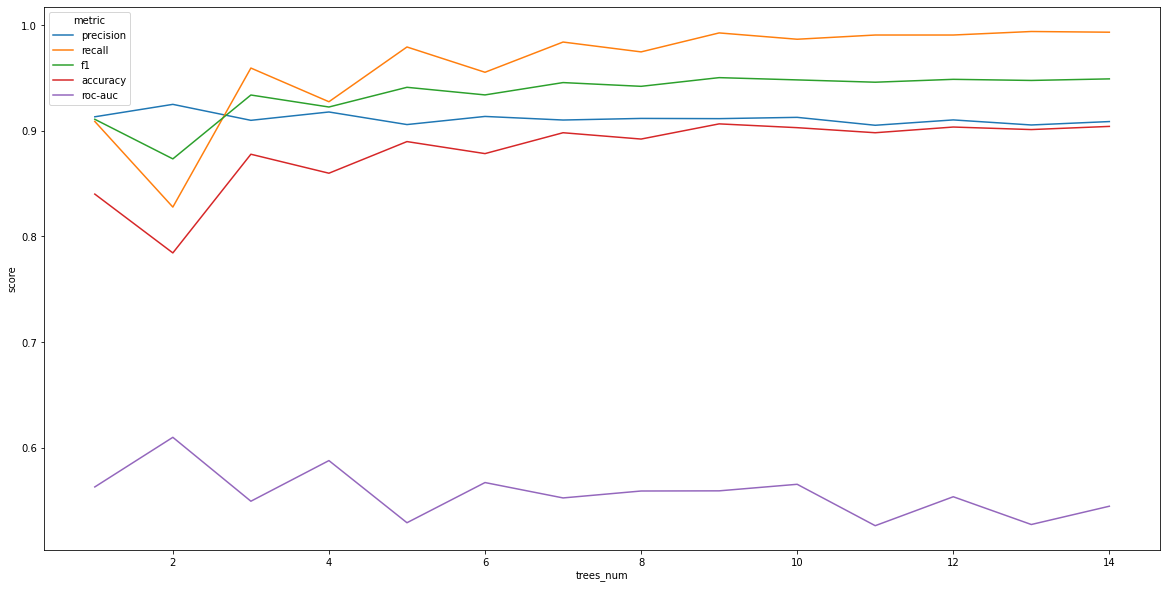

In [89]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=trees_data, x="trees_num", y="score", hue="metric")
plt.show()

Судя по результатам можно сделать вывод, что опитмальное количество деревьев примерно 2 или 3 

### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валдиации. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Обучите Random Forest  с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

In [91]:
p = {
    'randomforestclassifier__n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                                             12, 15, 17, 20, 25, 40], 
    'randomforestclassifier__criterion': ['gini', 'entropy'], 
    'randomforestclassifier__max_depth': [2, 3, 4, 5, 10, 15, None]
}


five_fold = KFold(n_splits=5, shuffle=True)
random_forest_class = RandomForestClassifier(random_state=13)
random_forest_class_pipeline = make_pipeline(random_forest_class)

random_forest_class_grid = GridSearchCV(random_forest_class_pipeline, 
                                        p, 
                                        cv=five_fold, 
                                        scoring='f1', 
                                        n_jobs=-1)

In [104]:
random_forest_class_grid.fit(x_train, y_bin_G3_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_depth': [2, 3, 4, 5, 10,
                                                               15, None],
                         'randomforestclassifier__n_estimators': [1, 2, 3, 4, 5,
                                                                  6, 7, 8, 9,
                                                                  10, 12, 15,
                                                                  17, 20, 25,
                                                                  40]},
             scoring='f1')

In [105]:
random_forest_class_grid.best_params_

{'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__n_estimators': 25}

In [94]:
random_forest_class_grid.best_score_

0.9510127314899763

#### Отдельные деревьев

In [114]:
random_forest_model = RandomForestClassifier(criterion='gini', n_estimators=25)
random_forest_model.fit(x_train, y_bin_G3_tr)

RandomForestClassifier(n_estimators=25)

In [115]:
from sklearn.metrics import confusion_matrix, classification_report

In [116]:
predict = random_forest_model.predict(x_test)
print(classification_report(y_bin_G3_test, predict))
print('F1: ', metrics.f1_score(y_bin_G3_test, predict))

              precision    recall  f1-score   support

           0       0.67      0.12      0.20        17
           1       0.93      0.99      0.96       192

    accuracy                           0.92       209
   macro avg       0.80      0.56      0.58       209
weighted avg       0.91      0.92      0.90       209

F1:  0.9597989949748743


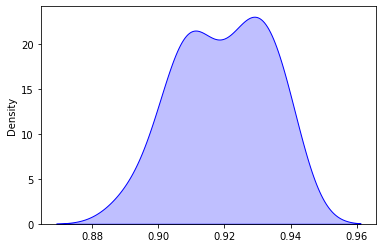

In [118]:
sc = [metrics.f1_score(y_bin_G3_test, tree.predict(x_test)) 
                for tree in random_forest_model.estimators_]
sc = pd.Series(sc)
fig = sns.kdeplot(trees_scores, shade=True, color="b")
plt.show()


Значение f1 ансамбля деревьев около 0.96
Значение f1 деревьев примерно 0.92-0.945
Было изначально понятно, что дерево по отдельности даст результат хуже

### Задание 4  
  
* Примените логистическую регрессию для решения задачи, подберите оптимальные значения гиперпараметров. Оцените качество (roc auc) на 5-fold валидации из 2 повторений. 
* Аналогично (на такой же валидации (тех же подвыборках) с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Обучите логистическую модель с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество - постройте ROC-кривую, вычислите roc auc. Вычислите аналогичную метрику для Random Forest из Задания 3, сравните точность моделей. 

In [121]:
from sklearn.model_selection import KFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

p = {
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'saga', 'sag', 'liblinear'], 
    'logisticregression__class_weight': ['balanced', None],
    'logisticregression__multi_class': ['ovr', 'multinomial']
}

repeat_5_fole = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
log_reg = LogisticRegression(max_iter=1000)
log_reg_pipeline = make_pipeline(log_reg)

log_reg_grid = GridSearchCV(log_reg_pipeline, p, cv=five_fold, 
                               scoring='roc_auc', n_jobs=-1)
log_reg_grid.fit(x_train, y_bin_G3_tr)

c:\users\iosmanov\pycharmprojects\iad\venv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.75231766 0.75224654 0.75165342 0.75182848 0.75135828 0.7502938
 0.75062552 0.7500419  0.74992475        nan 0.7514127  0.7514127
 0.7504649  0.74910781 0.74826204 0.75096976 0.75079926 0.74762547
 0.74778334        nan]
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'logisticregression__class_weight': ['balanced', None],
                         'logisticregression__multi_class': ['ovr',
                                                             'multinomial'],
                         'logisticregression__solver': ['newton-cg', 'lbfgs',
                                                        'saga', 'sag',
                                                        'liblinear']},
             scoring='roc_auc')

In [123]:
print(log_reg_grid.best_params_)
print()
print(log_reg_grid.best_score_)

{'logisticregression__class_weight': 'balanced', 'logisticregression__multi_class': 'ovr', 'logisticregression__solver': 'newton-cg'}

0.7523176640339517


### Logistic Regressiom with 5-fold Val

In [125]:
log_reg_model = LogisticRegression(multi_class='ovr', solver='newton-cg')
scores = cross_val_score(log_reg_model, x_train, y_bin_G3_tr, 
                         cv=repeat_5_fole, 
                         scoring='roc_auc')
print(np.mean(scores))
scores

0.7287613946240747


array([0.82119205, 0.65562914, 0.71882353, 0.6172549 , 0.72117647,
       0.83236755, 0.82077815, 0.66980392, 0.79686275, 0.63372549])

### Random Forest with 5-fold Val

In [126]:
random_forest_model = RandomForestClassifier(criterion='entropy', n_estimators=20)
scores = cross_val_score(random_forest_model, x_train, y_bin_G3_tr, 
                         cv=repeat_5_fole, 
                         scoring='roc_auc')
print(np.mean(scores))
scores

0.7285758018439165


array([0.74130795, 0.7870447 , 0.6772549 , 0.66156863, 0.75098039,
       0.70778146, 0.6906043 , 0.75764706, 0.69647059, 0.81509804])

Модели показывают примерно равный результат

### Полный

In [127]:
logistic_regr_model = LogisticRegression(multi_class='ovr', solver='newton-cg')
logistic_regr_model.fit(x_train, y_bin_G3_tr)
random_forest_class_model = RandomForestClassifier(criterion='entropy', n_estimators=20)
random_forest_class_model.fit(x_train, y_bin_G3_tr)

RandomForestClassifier(criterion='entropy', n_estimators=20)

Logistic


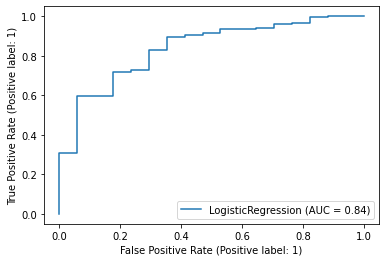

In [128]:
metrics.plot_roc_curve(logistic_regr_model, x_test, y_bin_G3_test)  
print('Logistic')
plt.show()

Random Forest


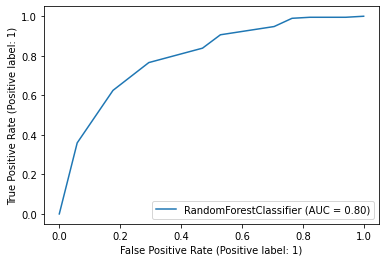

In [129]:
metrics.plot_roc_curve(random_forest_class_model, x_test, y_bin_G3_test)  
print('Random Forest')
plt.show()

На 5 fold валидации модели показали примерно одинаковый результат, а на отложенной выборке Logistic Regression

### Задание 5  
  
* Используйте для решения задачи один из фреймворков градиентного бустинга: XGBoost, LightGDB или CatBoost.  
* Оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.  
* Настройте гиперпараметры модели на 5-fold валидации, в качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.  
* Обучите модель с настроенными параметрами на всех данных для моделирования и оцените качество на отложенной выборке. Сравните результаты с другими моделями, дайте комментарий.

In [142]:
#!git clone --recursive https://github.com/dmlc/xgboost
#!cd xgboost
#!make -j4
#!cd python-package
#!python setup.py install

C:\Users\iosmanov\AppData\Local\Programs\Python\Python38-32\python.exe: can't open file 'setup.py': [Errno 2] No such file or directory


In [61]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [63]:
fold = KFold(n_splits=5, shuffle=True)
tr_list = np.arange(1, 30, 1)

rows = list()
tr_models = list()
for tr_num in tr_list:
    models_scores = []
    x_tr = np.array(x_train)
    y_bin_G3_tr = np.array(y_bin_G3_train)
    for tr_ind, tst_ind in fold.split(x_train, y_bin_G3_train):
        train_x = x_tr[tr_ind]
        train_y = y_bin_G3_train.iloc[tr_ind]
        test_x = x_tr[tst_ind]
        test_y = y_bin_G3_train.iloc[tst_ind]
        xgb_model = XGBClassifier(n_estimators=tr_num)
        xgb_model.fit(train_x, train_y)
        tr_models.append(xgb_model)
        prediction = xgb_model.predict(test_x)
        score = metrics.f1_score(test_y, prediction)
        models_scores.append(score)
    mean = np.mean(models_scores)
    rows.append((tr_num, mean))
xgb_data = pd.DataFrame(rows, columns=('trees_number', 'score'))
xgb_data.head()

[17:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-p

[17:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-p

[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-p


[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-p

[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-p

[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-p

[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-p

[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-p

[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-p

[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-p

[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-p

[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-p

[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-p

[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-p

[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-p

[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-p

[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-p

[17:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\admin\pycharmprojects\bd-task\venv\lib\site-p

[17:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,trees_number,score
0,1,0.940373
1,2,0.948705
2,3,0.944099
3,4,0.947832
4,5,0.947556


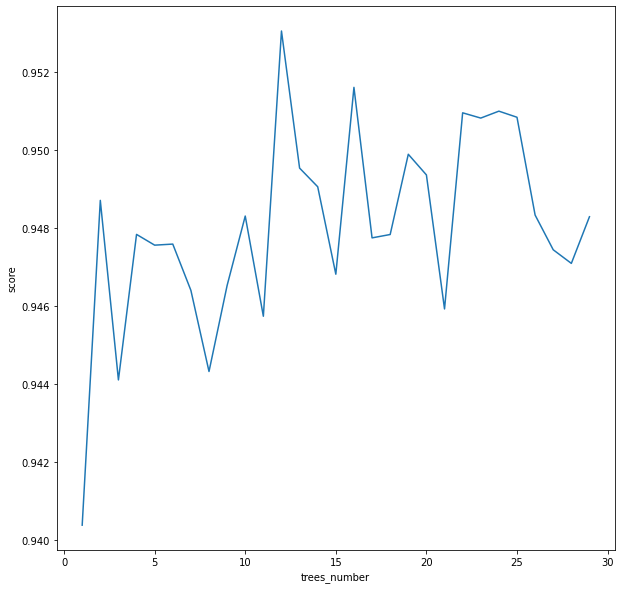

In [64]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=xgb_data, x="trees_number", y="score")
plt.show()

Как мы видим, увеличение количества деревьев не дает особого роста, кроме того, происходит снижение оценки

In [66]:
# Делаем подбор параметров
p = {
    'xgbclassifier__n_eta': np.arange(0, 1, 0.1), 
    'xgbclassifier__sampling_method': ['uniform', 'gradient_based'],
    'xgbclassifier__max_depth': np.arange(1, 15, 2),
    'xgbclassifier__gamma': [0, 1, 2, 5, 10],
}

fold = KFold(n_splits=5, shuffle=True)
xgb_classifier = XGBClassifier()
xgb_classifier_pipeline = make_pipeline(xgb_classifier)

xgb_classifier_grid = GridSearchCV(xgb_classifier_pipeline, 
                                   p, 
                                   cv=fold, 
                                   scoring='f1', 
                                   n_jobs=-1)

c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_eta" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:35:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                            

In [72]:
%%time
xgb_classifier_grid.fit(x_train, y_bin_G3_tr)

[17:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_eta" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 3min 18s


c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                            

In [73]:
xgb_classifier_grid.best_params_

{'xgbclassifier__gamma': 0,
 'xgbclassifier__max_depth': 1,
 'xgbclassifier__n_eta': 0.0,
 'xgbclassifier__sampling_method': 'uniform'}

In [74]:
xgb_classifier_grid.best_score_

0.9516885505465986

In [75]:
xgb_class_model = XGBClassifier()
xgb_class_model.fit(x_train, y_bin_G3_tr)

predict = xgb_class_model.predict(x_test) 
print('f1: ', metrics.f1_score(y_bin_G3_test, predict))

[17:41:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1:  0.9569620253164558


c:\users\admin\pycharmprojects\bd-task\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGB


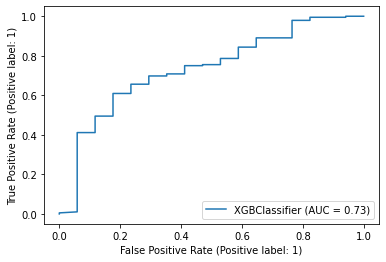

In [78]:
metrics.plot_roc_curve(xgb_class_model, x_test, y_bin_G3_test)  
print('XGB')
plt.show()

При сравнении Logistic Regression оказлся лучше Random Forest и XGBClassifier

##  Часть 4. Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* Для решения задачи примените следующие методы:  
  * KNN  
  * Логистическая регрессия  
  * Деревья решений  
  * Random Forest
  * Gradient Boosting
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, используйте confusion matrix и производные от нее метрики. Сделайте выводы.    

In [86]:
def print_classification_metrics(current, prediction):
    print("Report: ")
    print(metrics.classification_report(current, prediction))
    
    print("Accuracy: ", metrics.accuracy_score(current, prediction))
    print("Micro f1: ", metrics.f1_score(current, prediction, average='micro'))
    print("Macro f1: ", metrics.f1_score(current, prediction, average='macro'))
    print("Weighted f1: ", metrics.f1_score(current, prediction, average='weighted'))

### Изменение данных
Разобъем наши данные на классы:
0 - Отлично, 1 - Хорошо, 2 - Удовлетворительно, 3 - Неудовлетворительно

In [74]:
marks = {}
for mark in range(21):
    if mark < 8:
        marks[mark] = 3
    elif 8 <= mark <= 13:
        marks[mark] = 2
    elif 14 <= mark <= 17:
        marks[mark] = 1
    else:
        marks[mark] = 0

In [76]:
x_train = x_train_out_G2_G1
x_test = x_test_out_G2_G1
y_train_changed = y_train.replace(marks)
y_test_changed = y_test.replace(marks)

y_test_changed

753    2
207    2
401    3
10     2
733    0
      ..
619    0
77     2
312    2
143    1
586    1
Name: G3, Length: 209, dtype: int64

### KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

p = {
    'kneighborsclassifier__n_neighbors': np.arange(1, 50, 1), 
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['ball_tree', 'kd_tree', 'brute']
}

In [87]:
k_fold = KFold(n_splits=5, shuffle=True)
knn_classifier = KNeighborsClassifier()
pipeline = make_pipeline(knn_classifier)

knn_gridcv = GridSearchCV(pipeline, p, cv=k_fold, 
                        scoring='f1_weighted', n_jobs=-1)
knn_gridcv.fit(x_train, y_train_changed)
y_pred = knn_gridcv.predict(x_test)
print_classification_metrics(y_test_changed, y_pred)


Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.40      0.44      0.42        43
           2       0.75      0.84      0.79       140
           3       0.80      0.21      0.33        19

    accuracy                           0.67       209
   macro avg       0.49      0.37      0.39       209
weighted avg       0.66      0.67      0.64       209

Accuracy:  0.6698564593301436
Micro f1:  0.6698564593301436
Macro f1:  0.38585858585858585
Weighted f1:  0.6449374124015272


c:\users\iosmanov\pycharmprojects\iad\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\iosmanov\pycharmprojects\iad\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\iosmanov\pycharmprojects\iad\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
knn_gridcv.best_params_

{'kneighborsclassifier__algorithm': 'kd_tree',
 'kneighborsclassifier__n_neighbors': 8,
 'kneighborsclassifier__weights': 'distance'}

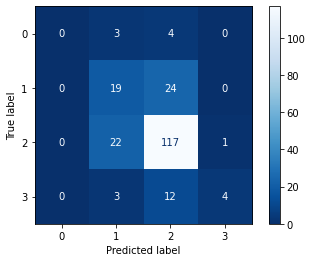

In [90]:

knn_best_classifier = knn_gridcv.best_estimator_
plot_confusion_matrix(knn_best_classifier, x_test, y_test_changed, cmap=plt.get_cmap('Blues_r'))

Вывод по KNN следующий, модель научилась предсказывать Удовлетворительную оценку (2-я оценка), также 1-ю оценку, но хуже. Но в общем предсказание получилось не слишком хорошим, вполне возможно это произошло из-за выборки.

### Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize

params = {
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
    'logisticregression__class_weight': ['balanced', None],
    'logisticregression__multi_class': ['ovr', 'multinomial']
}

In [93]:
k_f = KFold(n_splits=8, shuffle=True)
log_reg = LogisticRegression(max_iter=500)
pipeline = make_pipeline(log_reg)

log_grid = GridSearchCV(pipeline, params, cv=k_f, 
                            scoring='f1_weighted', n_jobs=-1)

log_grid.fit(x_train, y_train_changed)

y_pred = log_grid.predict(x_test)

print_classification_metrics(y_test_changed, y_pred)

Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.50      0.44      0.47        43
           2       0.75      0.88      0.81       140
           3       0.83      0.26      0.40        19

    accuracy                           0.70       209
   macro avg       0.52      0.40      0.42       209
weighted avg       0.68      0.70      0.67       209

Accuracy:  0.7033492822966507
Micro f1:  0.7033492822966507
Macro f1:  0.418923294879579
Weighted f1:  0.6731620683878377


c:\users\iosmanov\pycharmprojects\iad\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\iosmanov\pycharmprojects\iad\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\iosmanov\pycharmprojects\iad\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
log_grid.best_params_

{'logisticregression__class_weight': None,
 'logisticregression__multi_class': 'ovr',
 'logisticregression__solver': 'newton-cg'}

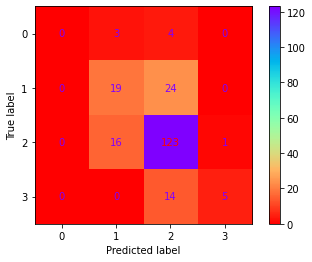

In [96]:
log_best = log_grid.best_estimator_
plot_confusion_matrix(log_best, x_test, y_test_changed, cmap=plt.get_cmap('rainbow_r'))
plt.show()

Вывод по логистической регрессии следующий, заметно, что метрики стали намного лучше, кроме того получилось предсказать 3-ю оценку, результаты лучше чем у KNN, однако все также сказывается неравномерность данных

### DecisionTree

In [97]:
from sklearn.tree import DecisionTreeClassifier

p = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'], 
    'decisiontreeclassifier__splitter': ['best', 'random'],
    'decisiontreeclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'decisiontreeclassifier__min_samples_split': np.arange(2, 10, 1),
    'decisiontreeclassifier__max_depth':  np.arange(2, 20, 2),
    'decisiontreeclassifier__random_state': [1]
    }

In [98]:
k_fold = KFold(n_splits=8, shuffle=True)
dec_tree = DecisionTreeClassifier()
pipeline = make_pipeline(dec_tree)
dec_tree_grid = GridSearchCV(pipeline, p, cv=k_fold, 
                            scoring='f1_weighted', n_jobs=-1)
dec_tree_grid.fit(x_train, y_train_changed)
y_pred = dec_tree_grid.predict(x_test)
print_classification_metrics(y_test_changed, y_pred)

Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.50      0.40      0.44        43
           2       0.75      0.82      0.78       140
           3       0.24      0.26      0.25        19

    accuracy                           0.66       209
   macro avg       0.37      0.37      0.37       209
weighted avg       0.63      0.66      0.64       209

Accuracy:  0.6555023923444976
Micro f1:  0.6555023923444976
Macro f1:  0.36913534417800625
Weighted f1:  0.639400114394807


In [100]:
dec_tree_grid.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 8,
 'decisiontreeclassifier__max_features': 'auto',
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__random_state': 1,
 'decisiontreeclassifier__splitter': 'best'}

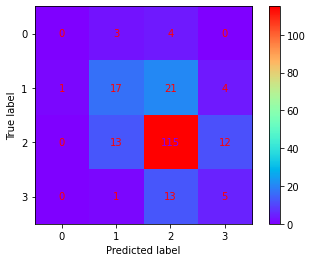

In [105]:

dec_tree_best = dec_tree_grid.best_estimator_
plot_confusion_matrix(dec_tree_best, x_test, y_test_changed, cmap=plt.get_cmap('rainbow'))
plt.show()

По дереву решений можно сделать следующий вывод. Модель хорошо предсказывает те оценки, в которых больше данных, однако оценки 3 и 0 предсказываются не совсем хорошо. Главная проблема нехватка данных

### Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
p = {
    'randomforestclassifier__criterion': ['gini', 'entropy'], 
    'randomforestclassifier__n_estimators': np.arange(50, 250, 10), 
    'randomforestclassifier__max_depth': np.arange(2, 20, 2),
    'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
     }

k_fold = KFold(n_splits=4, shuffle=True)
random_forest = RandomForestClassifier(random_state=1)
pipeline = make_pipeline(random_forest)
random_forest_grid = GridSearchCV(pipeline, p, cv=k_fold, 
                            scoring='f1_weighted', n_jobs=-1)
random_forest_grid.fit(x_train, y_train_changed)
y_pred = random_forest_grid.predict(x_test)
print_classification_metrics(y_test_changed, y_pred)

Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.54      0.33      0.41        43
           2       0.73      0.94      0.82       140
           3       0.33      0.05      0.09        19

    accuracy                           0.70       209
   macro avg       0.40      0.33      0.33       209
weighted avg       0.63      0.70      0.64       209

Accuracy:  0.6985645933014354
Micro f1:  0.6985645933014354
Macro f1:  0.32950570169460724
Weighted f1:  0.64191805793493


In [109]:
random_forest_grid.best_params_

{'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_depth': 12,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__n_estimators': 60}

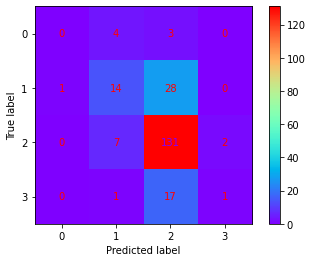

In [110]:
random_forest_best = random_forest_grid.best_estimator_
plot_confusion_matrix(random_forest_best, x_test, y_test_changed, cmap=plt.get_cmap('rainbow'))
plt.show()

Судя по результатам предскзание Random Forest не особо отличаются от предсказания DecisionTree. Хорошо предсказывается самый большая оценка - 2. При этом вообще не предсказываются оценки 2 и 0.

### Gradient Boosting

In [112]:
from sklearn.ensemble import GradientBoostingClassifier
p = {
    'gradientboostingclassifier__criterion': ['mae', 'friedman_mse', 'mse'], 
    'gradientboostingclassifier__n_estimators': np.arange(50, 150, 10), 
    'gradientboostingclassifier__max_features': ['log2', 'auto', 'sqrt'],
    'gradientboostingclassifier__loss': ['exponential', 'deviance']
}

k_fold = KFold(n_splits=6, shuffle=True)
gradient_boosting = GradientBoostingClassifier(random_state=1)
pipeline = make_pipeline(gradient_boosting)
gradient_grid = GridSearchCV(pipeline, p, cv=k_fold, 
                            scoring='f1_weighted', n_jobs=-1)
gradient_grid.fit(x_train, y_train_changed)
y_pred = gradient_grid.predict(x_test)

c:\users\iosmanov\pycharmprojects\iad\venv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.56506302 0.56952213 0.58388672 0.5878305  0.5937183  0.59628077
 0.60365681 0.60473626 0.60169196 0.60010429 0.5353534  0.54314996
 0.5470112  0.5470112  0.54374953 0.54478793 0.54478793 0.54478793
 0.54478793 0.54382894 0.56475061 0.57288658 0.58239491 0.58302708
 0.59363103 0.6052747  0.61008809 0.62102528 0.61705425 0.62369996
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan  

In [113]:
print_classification_metrics(y_test_changed, y_pred)

Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.47      0.42      0.44        43
           2       0.76      0.86      0.81       140
           3       0.42      0.26      0.32        19

    accuracy                           0.68       209
   macro avg       0.41      0.38      0.39       209
weighted avg       0.65      0.68      0.66       209

Accuracy:  0.6842105263157895
Micro f1:  0.6842105263157895
Macro f1:  0.3937764744216357
Weighted f1:  0.6620643851698027


In [114]:
gradient_grid.best_params_

{'gradientboostingclassifier__criterion': 'mse',
 'gradientboostingclassifier__loss': 'deviance',
 'gradientboostingclassifier__max_features': 'auto',
 'gradientboostingclassifier__n_estimators': 90}

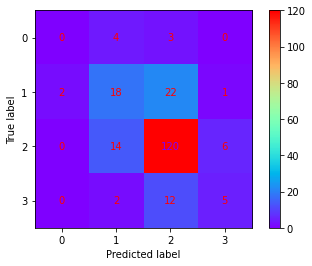

In [115]:
gradient_best = gradient_grid.best_estimator_
plot_confusion_matrix(gradient_best, x_test, y_test_changed, cmap=plt.get_cmap('rainbow'))
plt.show()

#### Заключение
GB показал неплохой результат. Хотя как ни одна из моделей не научился предсказывать оценка номер 3, так как не хватает данных. При этом судя по метрикам, результаты намного лучше

### Полный вывод
При сравнении стало понятно, что Gradient Boosting для этих данных подходит лучше всего и показывает лучшее качество по метрикам. На втором месте можно отметить логистическую регрессию. Основная проблема всех моделей неправильное распределение данных.